In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neurolib.models.multimodel.builder.aln import ExcitatoryALNMass

DPI = 75
CMAP = "cool"
plt.rcParams["figure.figsize"] = (20, 9)
plt.style.use("default_light.mplstyle")

SAVE_FIG = False

In [2]:
# init ALN mass such that transfer functions are loaded
aln_mass = ExcitatoryALNMass()

In [3]:
aln_mass.firing_rate_transfer_function.shape, aln_mass.mu_range.shape

((350, 64), (350,))

/Users/nikola/.virtualenvs/paper_thlm_aln/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


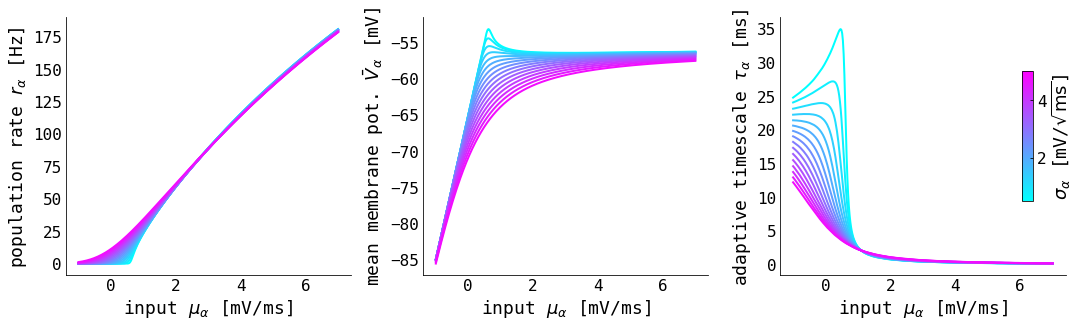

In [4]:
colors = [plt.get_cmap(CMAP)(i) for i in np.linspace(0, 1, len(aln_mass.sigma_range))]

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 4.5))
for ii in range(len(aln_mass.sigma_range))[::4]:
    axs[0].plot(
        aln_mass.mu_range,
        aln_mass.firing_rate_transfer_function[:, ii] * 1e3,
        color=colors[ii],
    )
    axs[1].plot(
        aln_mass.mu_range, aln_mass.voltage_transfer_function[:, ii], color=colors[ii]
    )
    axs[2].plot(
        aln_mass.mu_range, aln_mass.tau_transfer_function[:, ii], color=colors[ii]
    )
axs[0].set_ylabel(r"population rate $r_{\alpha}$ [Hz]")
axs[1].set_ylabel(r"mean membrane pot. $\bar{V}_{\alpha}$ [mV]")
axs[2].set_ylabel(r"adaptive timescale $\tau_{\alpha}$ [ms]")
for ax in axs:
    ax.set_xlabel(r"input $\mu_{\alpha}$ [mV/ms]")
    sns.despine(ax=ax)

cbar_ax = fig.add_axes([0.95, 0.4, 0.01, 0.4])
cbar = mpl.colorbar.ColorbarBase(
    cbar_ax,
    cmap=plt.get_cmap(CMAP),
    norm=mpl.colors.Normalize(
        vmin=aln_mass.sigma_range[0], vmax=aln_mass.sigma_range[-1]
    ),
    orientation="vertical",
)
cbar.set_label(r"$\sigma_{\alpha}$ [mV/$\mathrm{\sqrt{ms}}$]")
plt.tight_layout()

# to PDF due transparency
if SAVE_FIG:
    plt.savefig(
        "../figs/aln_cascade.pdf", dpi=DPI, transparent=True, bbox_inches="tight"
    )